In [1]:
clear()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data = pd.read_csv("returns.csv")
print( 'Data set size: ', len( data ) )

Data set size:  25421


In [4]:
data.head()

,Date,Mkt_RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [5]:
# create the Market return data
data['Mkt']=data['Mkt_RF']+data['RF'] 

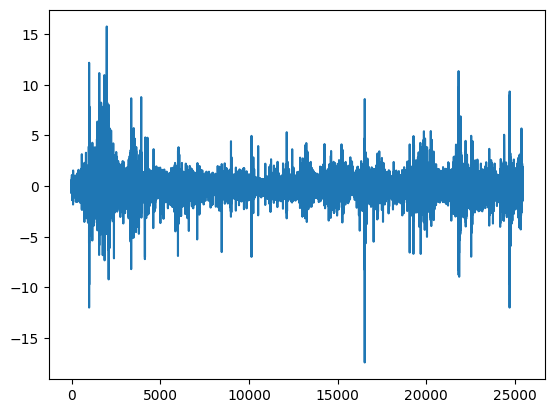

In [6]:
# plot the Market return data
plt.plot(data['Mkt'])

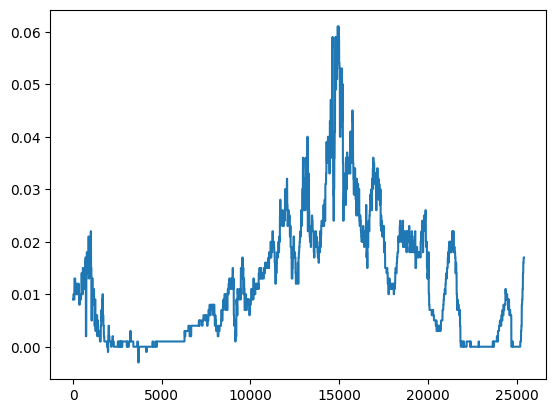

In [7]:
# create the risk-free rate
plt.plot(data['RF'])

In [8]:
# create the realized volatility data (see the docx file on Latte named "Stock_market")
data['vol']=np.nan
n=len(data)
for t in range(n+2):
    data.at[t,'vol']= np.sqrt(sum(data.iloc[range(t-20,t)]['Mkt']**2))

In [9]:
# alternatively, you can use the following to create realized volalitity (thanks to Jeong)
data['Mkt_squared'] = data['Mkt']**2
data['vol'] = (data['Mkt_squared'].rolling(20).sum())**0.5

In [10]:
data=data[data['vol'].isna()==False]


In [11]:
Y=np.asarray(data['Mkt']) # we treat the variable as an array so it's the same as in the KNN example
X=np.asarray(data['vol'])


In [12]:
# one part A, we train the model
# on part B, we find the quantile
# on part C (test), we check the performance of the prediction interval
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.4, random_state = 213)
trainA_x, trainB_x, trainA_y, trainB_y = train_test_split(train_x, train_y, test_size=0.4, random_state = 213)

In [13]:
# train the model using data in A
knnReg = KNeighborsRegressor(20, weights='uniform')
knnReg.fit(trainA_x.reshape(-1, 1), trainA_y) # train the model using data in A


KNeighborsRegressor(n_neighbors=20)

In [14]:
# apply the conformal prediction idea to data in B
pred_B = knnReg.predict(trainB_x.reshape(-1, 1))
pred_err_B=trainB_y-pred_B

q=np.quantile(abs(pred_err_B), 0.95)

In [15]:
# let's try the conformal prediction on test data
pred_test = knnReg.predict(test_x.reshape(-1, 1))
lower_bound=pred_test-q
upper_bound=pred_test+q

sum((test_y >= lower_bound) & (test_y <= upper_bound))/len(test_y) # compute the unconditional coverage probability

0.9471456692913386